# Import Required Modules

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
#Download required ntlk packages and lib
#!pip --quiet install nltk
import nltk
nltk.download("vader_lexicon")
nltk.download("stopwords")
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import *
from sklearn.cluster import KMeans
from wordcloud import WordCloud


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ishinderghuman/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ishinderghuman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/Users/ishinderghuman/anaconda/lib/python2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Streaming and Collecting Twitter Data

### Use twitter API to gather tweets

In [2]:
#Import the necessary methods from tweepy library
#from tweepy.streaming import StreamListener
#from tweepy import OAuthHandler
#from tweepy import Stream

#Variables that contains the user credentials to access Twitter API 
#access_token = "838946653642047488-Wjp2dBeD8gtoVQ4Jwj7EtUtjqoH1BIh"
#access_token_secret = "z7sr6emg6GwzQ86AXNREdoSVJQfv2uccsSsYJFNqURjiJ"
#consumer_key = "mzYvHyuG1SEWYgdSVdFO7pCsH"
#consumer_secret = "lqXBx2zgbpv8S5i61C0xcKrAqhi8dOTVZxo1ce16JAokjLcYrP"


#This is a basic listener that just prints received tweets to stdout.
#class StdOutListener(StreamListener):

#    def on_data(self, data):
#        print (data)
#        return True

#    def on_error(self, status):
#        print (status)


#if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
#    l = StdOutListener()
#    auth = OAuthHandler(consumer_key, consumer_secret)
#    auth.set_access_token(access_token, access_token_secret)
#    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: 'canada'
#    stream.filter(track=['environment canada','canadian environment','canada climate change','canada pipeline','canada oilsands','canada pollution','canada emissions','canada greenhouse'])


### Extract tweet from json file

In [3]:
#tweets_data_path = '/Users/ishinderghuman/Desktop/twitter_environment.txt'

#tweets_data = []
#tweets_file = open(tweets_data_path, "r")
#for line in tweets_file:
#    try:
#        tweet = json.loads(line)
#        tweets_data.append(tweet)
#    except:
#        continue

### Save tweets as CSV file

In [4]:
#env_df = pd.DataFrame(tweets_data, columns=["text"])
#env_df.to_csv('env_tweets.csv', index=False)

# Section 1: Read and Analyze Tweets

### Open tweets text file and

In [5]:
'''
tweets_data = []
tweets_file = open("twitter_data_1.txt", "r")

for line in tweets_file:
    if (len(line)):
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
tweets = pd.DataFrame()

tweets['text'] = list(map(lambda tweet: str(tweet.get('text', None)),tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet.get('lang', None),tweets_data))
tweets['country'] = list(map(lambda tweet: tweet.get('place', None).get('country', None) if tweet.get('place', None) != None else None,tweets_data))
tweets.to_csv('tweets1.csv', index=False)
'''

'\ntweets_data = []\ntweets_file = open("twitter_data_1.txt", "r")\n\nfor line in tweets_file:\n    if (len(line)):\n        try:\n            tweet = json.loads(line)\n            tweets_data.append(tweet)\n        except:\n            continue\ntweets = pd.DataFrame()\n\ntweets[\'text\'] = list(map(lambda tweet: str(tweet.get(\'text\', None)),tweets_data))\ntweets[\'lang\'] = list(map(lambda tweet: tweet.get(\'lang\', None),tweets_data))\ntweets[\'country\'] = list(map(lambda tweet: tweet.get(\'place\', None).get(\'country\', None) if tweet.get(\'place\', None) != None else None,tweets_data))\ntweets.to_csv(\'tweets1.csv\', index=False)\n'

In [6]:
tweets = pd.read_csv(open('tweets1.csv','rU'), encoding='utf-8', engine='c')
tweets.columns= ['text','lang','country']
tweets.head()

,text,lang,country
0,RT @sankrant: Hard to look at this data and no...,en,NaN
1,RT @selena_sourcefr: Selena Gomez et The Weekn...,en,NaN
2,RT @Darren_Desmond: US man held for sending fl...,en,NaN
3,RT @SpecialODad: @SpecialOCanada Team East flo...,en,NaN
4,RT @JohnParker1988: Rock and roll legend Chuck...,en,NaN


# Plot the languages used in the tweets

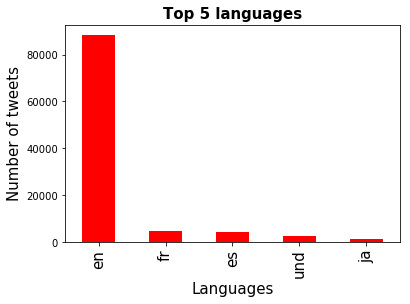

In [7]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

# From this plot it can be seen that the majority of the tweets (> 90%) are in english

### Now plot the originating country of each tweet

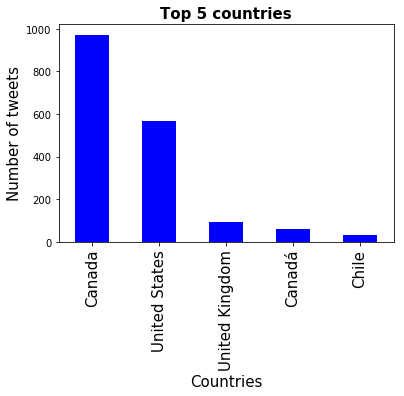

In [8]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

### From this it can be seen that the majority of tweets to not have a country associated to them

### Create a new dataframe with only the tweets in english

In [9]:
# Create new dataframe with tweets exluding empty ones
tweetDf = tweets
tweets = pd.DataFrame()
tweets = (tweetDf.loc[tweetDf['lang'] == 'en'])
tweets.head()

,text,lang,country
0,RT @sankrant: Hard to look at this data and no...,en,NaN
1,RT @selena_sourcefr: Selena Gomez et The Weekn...,en,NaN
2,RT @Darren_Desmond: US man held for sending fl...,en,NaN
3,RT @SpecialODad: @SpecialOCanada Team East flo...,en,NaN
4,RT @JohnParker1988: Rock and roll legend Chuck...,en,NaN


### Create a dataframe with only the text and remove duplicates an emptry rows

In [10]:
Tweets = pd.DataFrame()
Tweets['text'] = tweets['text'].dropna()
# Remove duplicates
Tweets = Tweets.drop_duplicates('text')

Tweets.head()

,text
0,RT @sankrant: Hard to look at this data and no...
1,RT @selena_sourcefr: Selena Gomez et The Weekn...
2,RT @Darren_Desmond: US man held for sending fl...
3,RT @SpecialODad: @SpecialOCanada Team East flo...
4,RT @JohnParker1988: Rock and roll legend Chuck...


### Define functions to process tweets

In [11]:
# Lower case all characters in tweet
def lower_case(tw):
    
    return tw.lower()

# Remove punctuation from tweet
# Replace words with hashtags with the exact same word but without hastag
def clean_data(tw):

    # Define an array with punctuation characters
    Punctuation = [".", ",", "'",'"', ";", ":", "!", "?", "-", "/", 
                   "\\",'@','$','%','^','*','(',')','[',']','{','}',
                   '|','<','>','+','_']       
    # Define hashtag character
    Hashtag = ["#"]
    
    # Loop through each character in tweet
    for char in tw:
        # If a punctuation is used, remove it
        if char in Punctuation:
            tw = tw.replace(char, "")
        # If a hashtag is used, replace it with a space
        if char in Hashtag:
            tw = tw.replace(char, " ")
    
    return tw    

# Remove stop words from tweet
# Tweet should already be lower cased and cleaned
def remove_stop_words(tw):

    # Open the stop_words file and split it into words
    stop_words = set(stopwords.words('english'))
    
    # Create a list to hold words in tweet not in stop words
    temp = list()
    
    # Go through every word in tweet
    for word in tw.split():    
        # Create a list of all words not in stop_words.txt
        if word not in stop_words:
            temp.append(word)
        # Join list of tweet words with stop words removed
        tw = " ".join(temp)
    
    return tw

# Remove URL from tweets
# tweet should already be lower cased
def remove_URL(tw):

    temp = []
    tw = tw.lower()
    for word in tw.split():
        if (word.find("http") == -1 and word.find("www") == -1 and word.find(".com") == -1):
            temp.append(word)           
    # Join list of tweet words with stop words removed
    tw = " ".join(temp)   

    return tw

# Remove words that contain a number
# Exanple: 150th, 2nd, 530am
def remove_words_containing_numbers(tw):
    
    return ' '.join(s for s in tw.split() if not any(c.isdigit() for c in s))

def remove_RT(tw):
    
    temp = []
    tw = tw.lower()
    for word in tw.split():
        if (word.find("rt") == -1):
            temp.append(word)           
    # Join list of tweet words with stop words removed
    tw = " ".join(temp)   

    return tw    
    
    
# This function processes tweets using a combination of the above functions
# It outputs a lower cased, punctuation removed, stop words, removed and url removed tweet
def process_tweet(tw):

    # Lower Case Tweet
    tw = lower_case(tw)
    # Remove URLs
    tw = remove_URL(tw)
    # Remover Punctuation
    tw = clean_data(tw)
    # Remover Stop Words
    tw = remove_stop_words(tw) 
    # Remove words containg a number
    tw = remove_words_containing_numbers(tw)
    # Remove "RT"
    tw = remove_RT(tw)
        
    return tw


### Process and Filter Tweets

In [12]:
# Create new dataframe with tweets preprocessed and filtered
Tweets_list = list((Tweets['text']))
text_list = []
for text in Tweets_list:
    text_list.append(process_tweet(text))

Tweets_Processed = pd.DataFrame()

Tweets_Processed['tweet'] = text_list

Tweets_Processed.head()

,tweet
0,sankrant hard look data question csection due ...
1,selenasourcefr selena gomez et weeknd toronto ...
2,darrendesmond us man held sending flashing twe...
3,specialodad specialocanada team east floor hoc...
4,rock roll legend chuck berry dies


## Use K-means clustering to group the tweets into different clusters and identify the major topics of discussion about Canada

### Build the Model

In [13]:
# Vectorize Data
# Build K Clustering Model
# Fit data to model
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(list(Tweets_Processed['tweet']))
true_k = 8
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=8, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Print major words in each cluster

In [14]:
# Print words corresponding to each cluster

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print ("Cluster %d:" % i,)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind],)
    print

Top terms per cluster:
('Cluster 0:',)
(u' flight',)
(u' house',)
(u' air',)
(u' scare',)
(u' bomb',)
(u' driver',)
(u' tracker',)
(u' white',)
(u' detained',)
(u' collusion',)

('Cluster 1:',)
(u' number',)
(u' border',)
(u' illegals',)
(u' mexican',)
(u' record',)
(u' mexicans',)
(u' tracking',)
(u' crossing',)
(u' detained',)
(u' headed',)

('Cluster 2:',)
(u' im',)
(u' like',)
(u' canada',)
(u' history',)
(u' award',)
(u' international',)
(u' dont',)
(u' usa',)
(u' going',)
(u' listia',)

('Cluster 3:',)
(u' followers',)
(u' week',)
(u' new',)
(u' map',)
(u' usa',)
(u' canada',)
(u' live',)
(u' free',)
(u' uk',)
(u' countries',)

('Cluster 4:',)
(u' movie',)
(u' hello',)
(u' people',)
(u' uk',)
(u' usa',)
(u' enjoy',)
(u' pakistan',)
(u' watch',)
(u' canada',)
(u' new',)

('Cluster 5:',)
(u' cuba',)
(u' afford',)
(u' americans',)
(u' money',)
(u' care',)
(u' health',)
(u' free',)
(u' awaywe',)
(u' itour',)
(u' itdo',)

('Cluster 6:',)
(u' chuck',)
(u' berry',)
(u' roll',)
(u' rock'

### Add respective cluster to tweets dataframe

In [15]:
Tweets_Processed['cluster'] = model.labels_
Tweets_Processed = Tweets_Processed.drop_duplicates('tweet')

Tweets_Processed.head()

,tweet,cluster
0,sankrant hard look data question csection due ...,7
1,selenasourcefr selena gomez et weeknd toronto ...,7
2,darrendesmond us man held sending flashing twe...,7
3,specialodad specialocanada team east floor hoc...,7
4,rock roll legend chuck berry dies,6


### Count number of tweets in each cluster

In [16]:
Tweet_Groups = Tweets_Processed.groupby('cluster')
Tweet_Groups.count()

,tweet
cluster,
0,122
1,234
2,2272
3,79
4,3
5,84
6,523
7,37725


### View tweets in cluster i
### This will be run 8 times once for each cluster in order to get an understanding of the major topics of discussion in each cluster

In [17]:
# View tweets in cluster i
Tweets_Processed.loc[Tweets_Processed['cluster'] == 7]

,tweet,cluster
0,sankrant hard look data question csection due ...,7
1,selenasourcefr selena gomez et weeknd toronto ...,7
2,darrendesmond us man held sending flashing twe...,7
3,specialodad specialocanada team east floor hoc...,7
5,somebody knows shot toronto mother speaks bull...,7
6,oilsandsaction facts canadian environmental le...,7
10,amlozyk petition sharia law spreading across c...,7
11,jaketapper whole ocean protects canada us,7
12,brianjeanwrp jkenney canada needs strong lads ...,7
13,oh god make quick heads rolling jt way 🇨🇦,7


## From the above analysis the following topics were selected as "hot" topics of discussion about Canada:

### Refugee, Immigration, Police, Doctors, Nurses, Healthcare, LGBTQ, Enviroment, Trump, Trudeau

# Section 2: Exploration & Sentiment Analysis of the above Topics

### Read Tweets

In [18]:
tweetDf = pd.read_csv('tweets.csv')
tweetDf.columns= ['time','user','tweet']

### Instantiation

In [19]:
sid = SentimentIntensityAnalyzer()

stop = set(stopwords.words('english'))

### Assign sentiment to tweets using Vader

In [20]:
tweets = tweetDf['tweet'].as_matrix()
pdlist = []
#Assign Vader score to individual review using Vader compound score
for rownum, tweet in enumerate(tweets):
    ss = sid.polarity_scores(tweet)
    if ss['compound'] >= 0:
        binaryrating = 'positive'
    else:
        binaryrating = 'negative'
    pdlist.append([tweet]+[ss['compound']]+ [binaryrating])
    if (rownum % 100 == 1):
            print("processed %d reviews" % (rownum+1))

processed 2 reviews
processed 102 reviews
processed 202 reviews
processed 302 reviews
processed 402 reviews
processed 502 reviews
processed 602 reviews
processed 702 reviews
processed 802 reviews
processed 902 reviews
processed 1002 reviews
processed 1102 reviews
processed 1202 reviews
processed 1302 reviews
processed 1402 reviews
processed 1502 reviews
processed 1602 reviews
processed 1702 reviews
processed 1802 reviews
processed 1902 reviews
processed 2002 reviews
processed 2102 reviews
processed 2202 reviews
processed 2302 reviews
processed 2402 reviews
processed 2502 reviews
processed 2602 reviews
processed 2702 reviews
processed 2802 reviews
processed 2902 reviews
processed 3002 reviews
processed 3102 reviews
processed 3202 reviews
processed 3302 reviews
processed 3402 reviews
processed 3502 reviews
processed 3602 reviews
processed 3702 reviews
processed 3802 reviews
processed 3902 reviews
processed 4002 reviews
processed 4102 reviews
processed 4202 reviews
processed 4302 reviews


processed 34802 reviews
processed 34902 reviews
processed 35002 reviews
processed 35102 reviews
processed 35202 reviews
processed 35302 reviews
processed 35402 reviews
processed 35502 reviews
processed 35602 reviews
processed 35702 reviews
processed 35802 reviews
processed 35902 reviews
processed 36002 reviews
processed 36102 reviews
processed 36202 reviews
processed 36302 reviews
processed 36402 reviews
processed 36502 reviews
processed 36602 reviews
processed 36702 reviews
processed 36802 reviews
processed 36902 reviews
processed 37002 reviews
processed 37102 reviews
processed 37202 reviews
processed 37302 reviews
processed 37402 reviews
processed 37502 reviews
processed 37602 reviews
processed 37702 reviews
processed 37802 reviews
processed 37902 reviews
processed 38002 reviews
processed 38102 reviews
processed 38202 reviews
processed 38302 reviews
processed 38402 reviews
processed 38502 reviews
processed 38602 reviews
processed 38702 reviews
processed 38802 reviews
processed 38902 

processed 69002 reviews
processed 69102 reviews
processed 69202 reviews
processed 69302 reviews
processed 69402 reviews
processed 69502 reviews
processed 69602 reviews
processed 69702 reviews
processed 69802 reviews
processed 69902 reviews
processed 70002 reviews
processed 70102 reviews
processed 70202 reviews
processed 70302 reviews
processed 70402 reviews
processed 70502 reviews
processed 70602 reviews
processed 70702 reviews
processed 70802 reviews
processed 70902 reviews
processed 71002 reviews
processed 71102 reviews
processed 71202 reviews
processed 71302 reviews
processed 71402 reviews
processed 71502 reviews
processed 71602 reviews
processed 71702 reviews
processed 71802 reviews
processed 71902 reviews
processed 72002 reviews
processed 72102 reviews
processed 72202 reviews
processed 72302 reviews
processed 72402 reviews
processed 72502 reviews
processed 72602 reviews
processed 72702 reviews
processed 72802 reviews
processed 72902 reviews
processed 73002 reviews
processed 73102 

processed 103402 reviews
processed 103502 reviews
processed 103602 reviews
processed 103702 reviews
processed 103802 reviews
processed 103902 reviews
processed 104002 reviews
processed 104102 reviews
processed 104202 reviews
processed 104302 reviews
processed 104402 reviews
processed 104502 reviews
processed 104602 reviews
processed 104702 reviews
processed 104802 reviews
processed 104902 reviews
processed 105002 reviews
processed 105102 reviews


### Create dataframe with sentiment score

In [21]:
sentimentDf = pd.DataFrame(pdlist)
sentimentDf.columns = ['tweet','vader','vaderTruth']
sentimentDf

,tweet,vader,vaderTruth
0,RT @selena_sourcefr: Selena Gomez et The Weekn...,0.0000,positive
1,RT @Darren_Desmond: US man held for sending fl...,0.0000,positive
2,RT @SpecialODad: @SpecialOCanada Team East flo...,0.5423,positive
3,RT @JohnParker1988: Rock and roll legend Chuck...,0.0000,positive
4,'Somebody knows who shot him': Toronto mother ...,0.0000,positive
5,RT @OilsandsAction: Just the facts on Canadian...,0.0000,positive
6,RT @EyewearBooks: Rock and roll legend Chuck B...,0.0000,positive
7,BBC News - Rock and roll legend Chuck Berry di...,0.0000,positive
8,RT @60s70sKids: RIP- Rock and roll legend Chuc...,0.0000,positive
9,RT @amlozyk: Petition Against Sharia Law Sprea...,0.0000,positive


### Create pie chart of positive and negative tweets

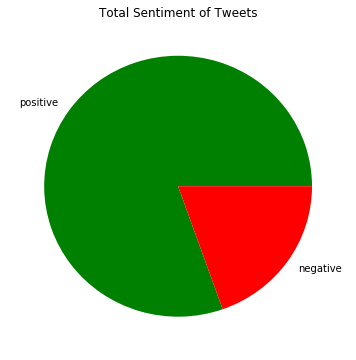

In [22]:
pd.Series(sentimentDf.vaderTruth.value_counts()).plot(figsize=(6, 6),kind="pie", colors=["g","r"])
plt.axes().set_ylabel('')
plt.title("Total Sentiment of Tweets")

### From the above chart it can be seen that the majority of tweets about canada are positive

### The number of positive vs negative tweets will now be similarly analyzed for the topics decided on in section 1

### The following code allows to do extract and analyze the tweets corresponding to a specific topic

In [23]:
#Count the frequency of words
from collections import Counter
import re
counter = Counter()
for tweet in tweets:
        counter.update([word.lower() for word in re.findall(r'\w+', tweet) if word.lower() not in stop and len(word) > 2])

In [24]:
#Top k word counted by frequency
k = 500
topk = counter.most_common(k)

In [25]:
#Find out if a particular review has the word from topk list
freqReview = []
for i in range(len(sentimentDf)):
    tempCounter = Counter([word for word in re.findall(r'\w+',sentimentDf['tweet'][i])])
    topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
    freqReview.append(topkinReview)

In [26]:
allTweets = tweetDf["tweet"].str.cat(sep=' ')
tweetWords = [word.strip(""" ,.:'\";""").lower() for word in allTweets.split()]
hashTags = [word for word in tweetWords if word.startswith("#")]
hashTagsCounter = Counter(hashTags)

In [44]:
abc=sentimentDf.sort_values('vaderTruth')
negative_tweets=abc[:20630]
positive_tweets=abc[20631:]

In [45]:
canada_Tag = sentimentDf[sentimentDf["tweet"].str.lower().str.contains("canada", na=False)].copy()
canada=pd.DataFrame([canada_Tag.tweet,canada_Tag.vaderTruth])
canada=canada.transpose()
canada=canada.drop_duplicates('tweet')
canada.vaderTruth.value_counts()

positive    39885
negative     8189
Name: vaderTruth, dtype: int64

In [46]:
negative_Tag = canada[canada["vaderTruth"].str.lower().str.contains("negative", na=False)].copy()
negative_Tag.to_csv("negative_canada.csv")
positive_Tag = canada[canada["vaderTruth"].str.lower().str.contains("positive", na=False)].copy()
positive_Tag.to_csv("positive_canada.csv")

In [47]:
def total_sentiment(keyword):
    negative=negative_Tag[negative_Tag["tweet"].str.lower().str.contains(keyword, na=False)].copy()
    positive=positive_Tag[positive_Tag["tweet"].str.lower().str.contains(keyword, na=False)].copy()
    return len(negative)/len(negative_Tag)*100, len(positive)/len(positive_Tag)*100
def plot_sentiment(keyword):
    pd.Series(total_sentiment(keyword),index=['Negative','Positive']).plot(figsize=(6, 6),kind="pie", colors=["red","green"])
    plt.axes().set_ylabel('')

### Now that the above have been defined, the topics can be analyzed.

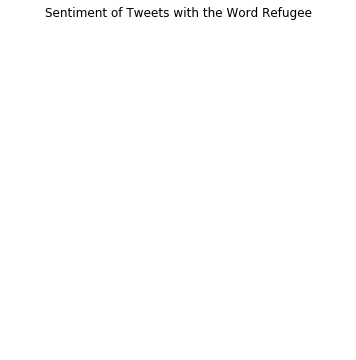

In [48]:
plot_sentiment("refugee")
plt.title("Sentiment of Tweets with the Word Refugee")

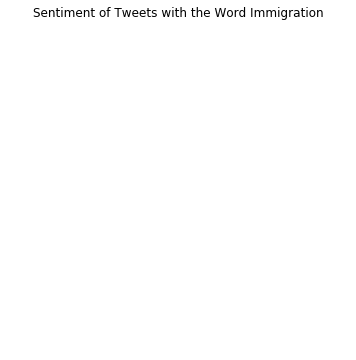

In [49]:
plot_sentiment("immigration")
plt.title("Sentiment of Tweets with the Word Immigration")

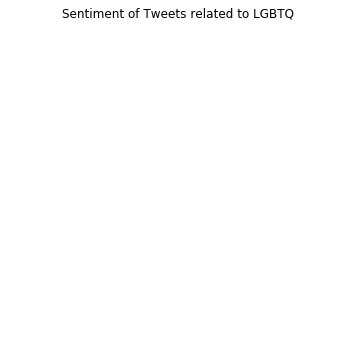

In [50]:
lgbt_negative=negative_Tag[negative_Tag["tweet"].str.lower().str.contains("gay", na=False) | \
                           negative_Tag["tweet"].str.lower().str.contains("lgbt", na=False) | \
                          negative_Tag["tweet"].str.lower().str.contains("lesbian", na=False)|\
                          negative_Tag["tweet"].str.lower().str.contains("queer", na=False)].copy()
lgbt_positive=positive_Tag[positive_Tag["tweet"].str.lower().str.contains("gay", na=False) | \
                           positive_Tag["tweet"].str.lower().str.contains("lgbt", na=False) | \
                          positive_Tag["tweet"].str.lower().str.contains("lesbian", na=False)|\
                          positive_Tag["tweet"].str.lower().str.contains("queer", na=False)].copy()
pd.Series((len(lgbt_negative)/len(negative_Tag)*100,len(lgbt_positive)/len(positive_Tag)*100),index=['Negative', 'Positive']).plot(figsize=(6,6),kind="pie", colors=["red","green"])
plt.axes().set_ylabel('')
plt.title("Sentiment of Tweets related to LGBTQ")

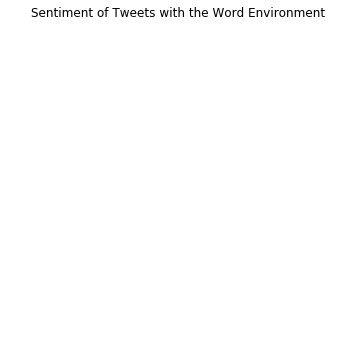

In [51]:
plot_sentiment("environment")
plt.title("Sentiment of Tweets with the Word Environment")

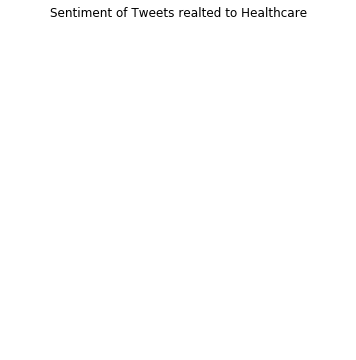

In [52]:
plot_sentiment("doctor")
plt.title("Sentiment of Tweets realted to Healthcare")

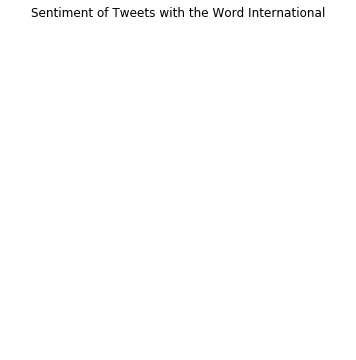

In [53]:
negative=negative_Tag[negative_Tag["tweet"].str.lower().str.contains("international", na=False)].copy()
positive=positive_Tag[positive_Tag["tweet"].str.lower().str.contains("international", na=False)].copy()
total_sent=len(negative)/len(negative_Tag)*1000, len(positive)/len(positive_Tag)*1000
total_sent
pd.Series(total_sent,index=['Negative','Positive']).plot(figsize=(6, 6),kind="pie", colors=["red","green"])
plt.axes().set_ylabel('')
plt.title("Sentiment of Tweets with the Word International")

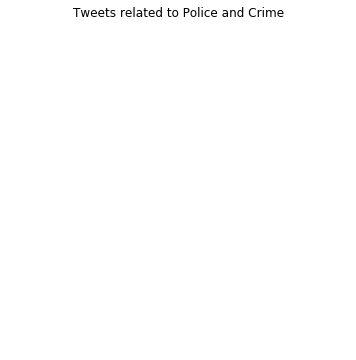

In [54]:
police_negative=negative_Tag[negative_Tag["tweet"].str.lower().str.contains("police", na=False)|\
                            negative_Tag["tweet"].str.lower().str.contains("crime", na=False)].copy()
police_positive=positive_Tag[positive_Tag["tweet"].str.lower().str.contains("police", na=False)|\
                           positive_Tag["tweet"].str.lower().str.contains("crime", na=False)].copy()
pd.Series((len(police_negative)/len(negative_Tag)*100, len(police_positive)/len(positive_Tag)*100),index=['Negative','Positive']).plot(figsize=(6, 6), kind="pie", colors=["r","g"])
plt.axes().set_ylabel("")
plt.title("Tweets related to Police and Crime")

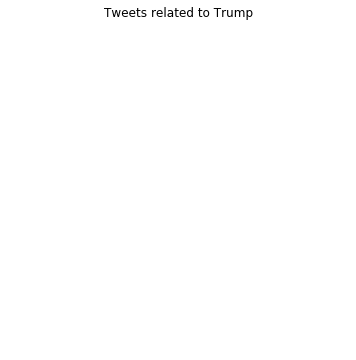

In [55]:
plot_sentiment("trump")
plt.title("Tweets related to Trump")

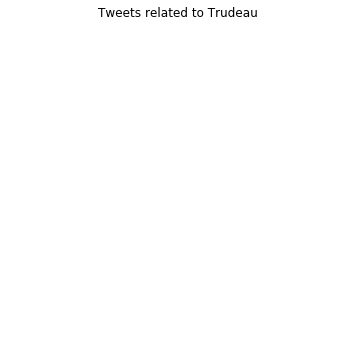

In [56]:
plot_sentiment("trudeau")
plt.title("Tweets related to Trudeau")

## After further analyzing the above topics, it was decided to focus the rest of the project on Canada's international reputation towards the enviroment.

# Section 3: Gather more Data on the Enviroment and Canada

## I: Twitter API was used to gather more tweets specifically about Canada and the Enviroment

### The tweets were saved into a csv fike.

### The tweets will be analyzed using the K-Means clustering algorithm and sentiment analysis.

### The process is similar to the one already discussed above

#### Read tweets and process them

In [57]:
# Read Tweets
tweetDf = pd.read_csv('env_tweets.csv')
tweetDf.columns= ['tweet']

# Drop Duplicates
tweetDF = tweetDf.drop_duplicates()

tweetDF.head()

,tweet
0,RT @danagram: Plunging price of renewable ener...
1,RT @TransMtn: Read: Economist Patricia Mohr di...
2,RT @mamiekuma: The oilsands are great for Cana...
3,Let's hope! - Canadian report says plunging pr...
4,RT @Schtaunkhauser: Worst Mining Spill in Cana...


In [58]:
# Create new dataframe with tweets preprocessed and filtered
Tweets_list = list((tweetDF['tweet']))
text_list = []
for text in Tweets_list:
    text_list.append(process_tweet(text))

Tweets_Processed_Env = pd.DataFrame()

Tweets_Processed_Env['tweet'] = text_list

Tweets_Processed_Env.head()

,tweet
0,danagram plunging price renewable energy makes...
1,transmtn read economist patricia mohr discusse...
2,mamiekuma oilsands great canadas economy decad...
3,lets hope canadian says plunging price renewab...
4,schtaunkhauser worst mining spill canadian his...


### Cluster tweets into groups using K-Means

In [59]:
# Vectorize Data
# Build K Clustering Model
# Fit data to model
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(list(Tweets_Processed_Env['tweet']))
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [60]:
# Print words corresponding to each cluster

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print ("Cluster %d:" % i,)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind],)
    print

Top terms per cluster:
('Cluster 0:',)
(u' canada',)
(u' environment',)
(u' pipeline',)
(u' oil',)
(u' need',)
(u' canadas',)
(u' know',)
(u' salish',)
(u' sea',)
(u' ended',)

('Cluster 1:',)
(u' climate',)
(u' change',)
(u' study',)
(u' canada',)
(u' coauthor',)
(u' action',)
(u' shuffle',)
(u' calls',)
(u' wildlife',)
(u' meeting',)

('Cluster 2:',)
(u' price',)
(u' makes',)
(u' fuels',)
(u' fossil',)
(u' plunging',)
(u' inevitable',)
(u' says',)
(u' end',)
(u' renewable',)
(u' energy',)



### From the above we can see that each cluster has an overlaying topic:
### Cluster 1: Talks about pipeline and oil and climate change
### Cluster 2: Talks about the fossil fuels and renewable energy
### Cluster 3: Talks about wildlife

In [61]:
# Add respective cluster to tweets dataframe
Tweets_Processed_Env['cluster'] = model.labels_
Tweets_Processed_Env = Tweets_Processed_Env.drop_duplicates('tweet')

Tweets_Processed_Env.head()

,tweet,cluster
0,danagram plunging price renewable energy makes...,2
1,transmtn read economist patricia mohr discusse...,0
2,mamiekuma oilsands great canadas economy decad...,0
3,lets hope canadian says plunging price renewab...,2
4,schtaunkhauser worst mining spill canadian his...,0


In [62]:
# Count number of tweets in each cluster
Tweet_Groups_Env = Tweets_Processed_Env.groupby('cluster')
Tweet_Groups_Env.count()

,tweet
cluster,
0,148
1,43
2,17


In [63]:
# View tweets in cluster i
Tweets_Processed_Env.loc[Tweets_Processed_Env['cluster'] == 0]

,tweet,cluster
1,transmtn read economist patricia mohr discusse...,0
2,mamiekuma oilsands great canadas economy decad...,0
4,schtaunkhauser worst mining spill canadian his...,0
5,environment oh right hes socialist hypocrite,0
8,stock highest dividend yield s&ampptsx canada ...,0
11,beijerinc plunging prices renewableenergy show...,0
14,putin wearing russian canada goose parka equiv...,0
16,march end wintery note warns environment canad...,0
17,deepgreendesign yes sewage canada used green e...,0
18,canadas oil pipeline salish sea need know,0


In [64]:
# View tweets in cluster i
Tweets_Processed_Env.loc[Tweets_Processed_Env['cluster'] == 1]

,tweet,cluster
7,canada host international climate change meeti...,1
9,nsenvironment leading canada climate change su...,1
10,heres europe canada ranks race climate change ...,1
12,unacgreencorps nsenvironment leading canada cl...,1
13,chevymo climate desperate need change arroganc...,1
21,help species follow shifting climate connectin...,1
24,futureconomy trump backs climate change canada...,1
39,realdonaldtrump scottpruittok canada 🇨🇦 chal...,1
44,pulseagnews pulse canada ceo urges government ...,1
57,financialpost terence corcoran trump playing g...,1


In [65]:
# View tweets in cluster i
Tweets_Processed_Env.loc[Tweets_Processed_Env['cluster'] == 2]

,tweet,cluster
0,danagram plunging price renewable energy makes...,2
3,lets hope canadian says plunging price renewab...,2
6,climatestore lets hope canadian says plunging ...,2
15,plunging price renewable energy makes end foss...,2
27,plunging price renewable energy makes end foss...,2
35,plunging price renewable energy makes end foss...,2
58,sguilbeault plunging price renewable energy ma...,2
59,merransmith plunging price renewable energy ma...,2
66,lindajeffreys plunging price renewableenergy m...,2
104,plunging price renewableenergy makes end fossi...,2


#### Perform sentiment analysis on tweets

In [66]:
tweets = Tweets_Processed_Env['tweet'].as_matrix()

In [67]:
counter = Counter()
for tweet in tweets:
        counter.update([word.lower() for word in re.findall(r'\w+', tweet) if word.lower() not in stop and len(word) > 2])

In [68]:
#Top k word counted by frequency
k = 500
topk = counter.most_common(k)

In [69]:
pdlist = []
#Assign Vader score to individual review using Vader compound score
for rownum, tweet in enumerate(tweets):
    ss = sid.polarity_scores(tweet)
    if ss['compound'] >= 0:
        binaryrating = 'positive'
    else:
        binaryrating = 'negative'
    pdlist.append([tweet]+[ss['compound']]+ [binaryrating])
    if (rownum % 100 == 1):
            print("processed %d reviews" % (rownum+1))

processed 2 reviews
processed 102 reviews
processed 202 reviews


In [70]:
sentimentDf_pro = pd.DataFrame(pdlist)
sentimentDf_pro.columns = ['tweet','vader','vaderTruth']
sentimentDf_pro

,tweet,vader,vaderTruth
0,danagram plunging price renewable energy makes...,0.2732,positive
1,transmtn read economist patricia mohr discusse...,0.2732,positive
2,mamiekuma oilsands great canadas economy decad...,-0.6486,negative
3,lets hope canadian says plunging price renewab...,0.6124,positive
4,schtaunkhauser worst mining spill canadian his...,-0.6249,negative
5,environment oh right hes socialist hypocrite,0.0000,positive
6,climatestore lets hope canadian says plunging ...,0.6124,positive
7,canada host international climate change meeti...,0.0000,positive
8,stock highest dividend yield s&ampptsx canada ...,0.0000,positive
9,nsenvironment leading canada climate change su...,0.4767,positive


In [71]:
sentimentDf_pro.vaderTruth.value_counts()

positive    168
negative     40
Name: vaderTruth, dtype: int64

In [72]:
sentimentDf_pro['cluster'] = Tweets_Processed_Env['cluster']

sentimentDf_pro.head()

,tweet,vader,vaderTruth,cluster
0,danagram plunging price renewable energy makes...,0.2732,positive,2.0
1,transmtn read economist patricia mohr discusse...,0.2732,positive,0.0
2,mamiekuma oilsands great canadas economy decad...,-0.6486,negative,0.0
3,lets hope canadian says plunging price renewab...,0.6124,positive,2.0
4,schtaunkhauser worst mining spill canadian his...,-0.6249,negative,0.0


### Create plots of positibe vs negative sentiments for each cluster

positive    103
negative     24
Name: vaderTruth, dtype: int64


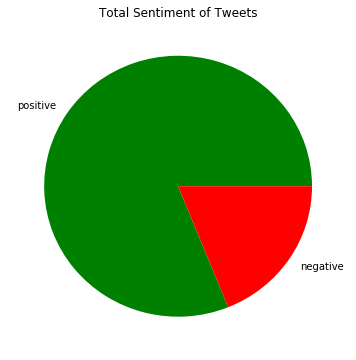

In [73]:
sent_cluster_1 = pd.DataFrame()

sent_cluster_1 = sentimentDf_pro.loc[sentimentDf_pro['cluster'] == 0.0]

print (sent_cluster_1.vaderTruth.value_counts())

pd.Series(sent_cluster_1.vaderTruth.value_counts()).plot(figsize=(6, 6),kind="pie", colors=["g","r"])
plt.axes().set_ylabel('')
plt.title("Total Sentiment of Tweets")

positive    28
negative     9
Name: vaderTruth, dtype: int64


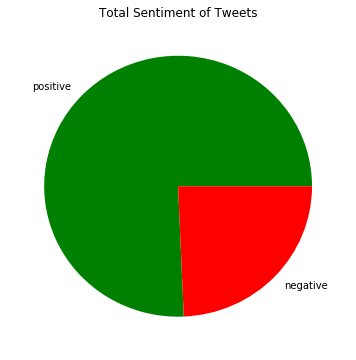

In [74]:
sent_cluster_2 = pd.DataFrame()

sent_cluster_2 = sentimentDf_pro.loc[sentimentDf_pro['cluster'] == 1.0]

print (sent_cluster_2.vaderTruth.value_counts())

pd.Series(sent_cluster_2.vaderTruth.value_counts()).plot(figsize=(6, 6),kind="pie", colors=["g","r"])
plt.axes().set_ylabel('')
plt.title("Total Sentiment of Tweets")

In [ ]:
sent_cluster_pipe = pd.DataFrame()

sent_cluster_3 = sentimentDf_pro.loc[sentimentDf_pro['cluster'] == 2.0]

print (sent_cluster_3.vaderTruth.value_counts())

pd.Series(sent_cluster_3.vaderTruth.value_counts()).plot(figsize=(6, 6),kind="pie", colors=["g","r"])
plt.axes().set_ylabel('')
plt.title("Total Sentiment of Tweets")

### Output negative tweets of each cluster

In [ ]:
sent_cluster_1.loc[sent_cluster_1['vaderTruth'] == 'negative']

In [ ]:
sent_cluster_2.loc[sent_cluster_2['vaderTruth'] == 'negative']

In [ ]:
sent_cluster_3.loc[sent_cluster_3['vaderTruth'] == 'negative']

## II: NYTimes API used to gather more data on Canada and the Enviroment

### The following code was used to gather data from NYTimes

In [ ]:
# Import modules.
#import json, uuid, time, csv, sys, pandas
#from nytimesarticle import articleAPI
#from IPython.display import display_javascript, display_html, display
#reload(sys)
#sys.setdefaultencoding('utf-8')

# Render the results as a json file.
#class RenderJSON(object):
#    def __init__(self, json_data):
#        if isinstance(json_data, dict):
#            self.json_str = json.dumps(json_data)
#        else:
#            self.json_str = json_data
#        self.uuid = str(uuid.uuid4())

#    def _ipython_display_(self):
#        display_html('<div id="{}" style="height: 600px; width:100%;"></div>'.format(self.uuid), raw=True)
#        display_javascript("""
#        require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
#        document.getElementById('%s').appendChild(renderjson(%s))
#        });
#        """ % (self.uuid, self.json_str), raw=True)

# Make a function that writes the json results as a csv file.
#def write_csv(data, filename):
#    with open(filename, 'w') as outf:
#        header = True
#        for item in data:
#            writter = csv.DictWriter(outf, item.keys())
#            if header == True:
#                writter.writeheader()
#                writter.writerow(item)
#                header = False#
#            else:
#                writter.writerow(item)
                
# Use the Article Search API to look for articles with a specific keyword 

# Get a key for Article Search API.
#api = articleAPI('0c669456826c452c95da6255aabbf596')

# Keyword: the article must have this word somewhere in the article
#q = 'environment'
# Headline: the article must have this word in the article's headline
#fq = {'headline': ['Canada', 'Canadian']}
# Features: these features are what will be included in the results
#fl = ['headline', 'web_url', 'snippet', 'lead_paragraph']

# All keywords used: environment, oil, energy, warming, climate, water, pipeline

# Store search results into 'articles'.
#articles = api.search( q = q, fq = fq, fl = fl )
#hits = articles['response']['meta']['hits']

# Prepare the search results to be written into csv file.
#for i in range(0, int(math.ceil(float(hits)/10))):
#    articles = api.search( q = q, fq = fq, fl = fl, page = i )
#    RenderJSON(articles) 
 #   with open('results.json', 'w') as f:  
  #      f.write(json.dumps(articles, indent = 2, skipkeys = True))  
   # data = json.loads(open('results.json').read())
   # data = data['response']['docs']
   # if i == 0:
    #    allData = data
    #else:
     #   for d in data:
      #      allData.append(d)
    # Wait 6 seconds between each usage of the API.
   # time.sleep(6)
    
# Save file as 'results_environment.csv' for the search with 'environment'.
#savefile = 'results_' + q + '.csv'
#write_csv(allData, savefile)

# Look at the csv file.
#pandas.read_csv(savefile)

# Analyse General Sentiment of Articles

In [ ]:
NYTDf = pd.read_csv("results.csv")
NYTDf.columns= ['headline','snippet','web_url','leadpar']
articles = NYTDf['leadpar'].dropna()

#Count the frequency of words
counter = Counter()
for article in articles:
    counter.update([word.lower() for word in re.findall(r'\w+', article) if word.lower() not in stop and len(word) > 2])

pdlist = []
#Assign Vader score to individual review using Vader compound score
for rownum, article in enumerate(articles):
    ss = sid.polarity_scores(article)
    if ss['compound'] >= 0:
        binaryrating = 'positive'
    else:
        binaryrating = 'negative'
    pdlist.append([article]+[ss['compound']]+ [binaryrating])

sentimentDf = pd.DataFrame(pdlist)
sentimentDf.columns = ['article','vader','vaderTruth']
pd.Series(sentimentDf.vaderTruth.value_counts()).plot(figsize=(6, 6),kind="pie", colors=["g","r"])
plt.axes().set_ylabel('')
plt.title("Sentiment of NYT articles on Canada and the environment")

# Analyse Sentiment of Articles related to Environment

In [ ]:
negative_Tag=sentimentDf[sentimentDf["vaderTruth"].str.lower().str.contains("negative", na=False)].copy()
positive_Tag=sentimentDf[sentimentDf["vaderTruth"].str.lower().str.contains("positive", na=False)].copy()
environment_negative=negative_Tag[negative_Tag["article"].str.lower().str.contains("environment", na=False) | \
                           negative_Tag["article"].str.lower().str.contains("oil", na=False) | \
                          negative_Tag["article"].str.lower().str.contains("nuclear", na=False)|\
                          negative_Tag["article"].str.lower().str.contains("gas", na=False)].copy()
environment_positive=positive_Tag[positive_Tag["article"].str.lower().str.contains("environemnt", na=False) | \
                           positive_Tag["article"].str.lower().str.contains("oil", na=False) | \
                          positive_Tag["article"].str.lower().str.contains("nuclear", na=False)|\
                          positive_Tag["article"].str.lower().str.contains("gas", na=False)].copy()
pd.Series((len(environment_negative)/len(negative_Tag)*100,len(environment_positive)/len(positive_Tag)*100),index=['Negative', 'Positive']).plot(figsize=(6,6),kind="pie", colors=["red","green"])
plt.axes().set_ylabel('')
plt.title("Sentiment of NYT Articles related to Environment")

## Define Function to perform sentiment analysis

In [ ]:
def sentiment_analysis(csv_filename, plot_title):
    NYTDf = pd.read_csv(csv_filename)
    NYTDf.columns= ['headline','snippet','web_url','leadpar']
    articles = NYTDf['leadpar'].dropna()

    #Count the frequency of words
    counter = Counter()
    for article in articles:
        counter.update([word.lower() for word in re.findall(r'\w+', article) if word.lower() not in stop and len(word) > 2])
        
    pdlist = []
    #Assign Vader score to individual review using Vader compound score
    for rownum, article in enumerate(articles):
        ss = sid.polarity_scores(article)
        if ss['compound'] >= 0:
            binaryrating = 'positive'
        else:
            binaryrating = 'negative'
        pdlist.append([article]+[ss['compound']]+ [binaryrating])

    sentimentDf = pd.DataFrame(pdlist)
    sentimentDf.columns = ['article','vader','vaderTruth']

    #pd.Series(sentimentDf.vaderTruth.value_counts()).plot(figsize=(6, 6),kind="pie", colors=["g","r"])
    #plt.axes().set_ylabel('')
    #plt.title("Sentiment of NYT articles on Canada and the environment")

    negative_Tag = sentimentDf[sentimentDf["vaderTruth"].str.lower().str.contains("negative", na=False)].copy()
    positive_Tag = sentimentDf[sentimentDf["vaderTruth"].str.lower().str.contains("positive", na=False)].copy()

    def total_sentiment(keyword):
        negative=negative_Tag[negative_Tag["article"].str.lower().str.contains(keyword, na=False)].copy()
        positive=positive_Tag[positive_Tag["article"].str.lower().str.contains(keyword, na=False)].copy()
        return len(negative)/len(negative_Tag)*100, len(positive)/len(positive_Tag)*100
    def plot_sentiment(keyword):
        pd.Series(total_sentiment(keyword),index=['Negative','Positive']).plot(figsize=(6, 6),kind="pie", colors=["red","green"])
        plt.axes().set_ylabel('')
    
    environment_negative= negative_Tag[negative_Tag["article"].str.lower().str.contains("environment", na=False) | \
                        negative_Tag["article"].str.lower().str.contains("oil", na=False) | \
                        negative_Tag["article"].str.lower().str.contains("nuclear", na=False) |\
                        negative_Tag["article"].str.lower().str.contains("gas", na=False) |\
                        negative_Tag["article"].str.lower().str.contains("water", na=False) |\
                        negative_Tag["article"].str.lower().str.contains("energy", na=False) |\
                        negative_Tag["article"].str.lower().str.contains("pipeline", na=False) |\
                        negative_Tag["article"].str.lower().str.contains("warming", na=False)].copy()
    environment_positive=positive_Tag[positive_Tag["article"].str.lower().str.contains("environment", na=False) | \
                        positive_Tag["article"].str.lower().str.contains("oil", na=False) | \
                        positive_Tag["article"].str.lower().str.contains("nuclear", na=False) |\
                        positive_Tag["article"].str.lower().str.contains("gas", na=False) |\
                        positive_Tag["article"].str.lower().str.contains("water", na=False) |\
                        positive_Tag["article"].str.lower().str.contains("energy", na=False) |\
                        positive_Tag["article"].str.lower().str.contains("pipeline", na=False) |\
                        positive_Tag["article"].str.lower().str.contains("warming", na=False)].copy()
    pd.Series((float(len(environment_negative))/float(len(negative_Tag))*100,float(len(environment_positive))/float(len(positive_Tag))*100),index=['Negative', 'Positive']).plot(figsize=(6,6),kind="pie", colors=["red","green"])
    plt.axes().set_ylabel('')
    plt.title(plot_title)

### Perform sentiment analysis

In [ ]:
sentiment_analysis("results_environment.csv", "Sentiment of NYT articles on Canada and the environment")

In [ ]:
sentiment_analysis("results_oil.csv", "Sentiment of NYT articles on Canada and oil")

In [ ]:
sentiment_analysis("results_climate.csv", "Sentiment of NYT articles on Canada and climate change")

In [ ]:
sentiment_analysis("results_energy.csv", "Sentiment of NYT articles on Canada and energy")

In [ ]:
sentiment_analysis("results_warming.csv", "Sentiment of NYT articles on Canada and global warming")

In [ ]:
sentiment_analysis("results_pipeline.csv", "Sentiment of NYT articles on Canada and the pipeline")